In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import sns
import numpy as np

In [110]:
df_ml = pd.read_csv('./artifacts/ml_models_results.csv')
df_cnn = pd.read_csv('./artifacts/cnn_models_results.csv')

In [111]:
# df_cnn.head(40)
cnn_BCICIV_I = df_cnn[df_cnn["dataset"] == 'BCICIV_I']
cnn_BCICIV_II = df_cnn[df_cnn["dataset"] == 'BCICIV_II']
cnn_eeg_mi = df_cnn[df_cnn["dataset"] == 'eeg-mi']

# CNN Models

## Dataset 1 - BCICIV_I

In [112]:
global_performance_BCICIV_I = cnn_BCICIV_I[cnn_BCICIV_I["subject"] == 'all']
global_performance_BCICIV_I

,model,dataset,subject,acc_train,acc_val,acc_test
7,DeepConvNet,BCICIV_I,all,0.842857,0.551429,0.560000
11,ShallowConvNet,BCICIV_I,all,0.890000,0.560000,0.542857
20,EEGNet,BCICIV_I,all,0.774286,0.520000,0.505714


In [113]:
individual_performance_BCICIV_I = cnn_BCICIV_I[cnn_BCICIV_I["subject"] != 'all']
individual_performance_BCICIV_I.head()

,model,dataset,subject,acc_train,acc_val,acc_test
0,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1a,1.00,0.86,0.80
1,EEGNet,BCICIV_I,BCICIV_calib_ds1a,0.91,0.72,0.72
2,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1f,1.00,0.70,0.72
4,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1g,0.99,0.68,0.64
5,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1c,1.00,0.42,0.58


In [114]:
def autolabel(rects, values, rot=0):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.93*height,
                values[idx],
                ha='center', va='bottom', rotation=rot)

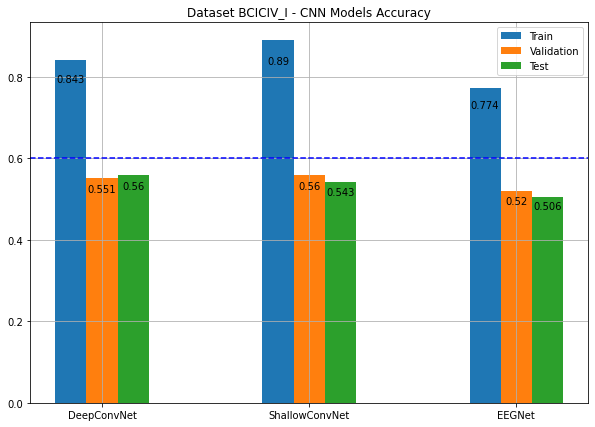

In [115]:
x = np.arange(len(global_performance_BCICIV_I['acc_val']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(10,7))
train = ax.bar(x - width, global_performance_BCICIV_I['acc_train'], width, label='Train')
validation = ax.bar(x, global_performance_BCICIV_I['acc_val'], width, label='Validation')
test = ax.bar(x + width, global_performance_BCICIV_I['acc_test'], width, label='Test')



autolabel(train,np.round(global_performance_BCICIV_I['acc_train'].values,3))
autolabel(validation,np.round(global_performance_BCICIV_I['acc_val'].values,3))
autolabel(test,np.round(global_performance_BCICIV_I['acc_test'].values,3))

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset BCICIV_I - CNN Models Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(global_performance_BCICIV_I['model'])
ax.grid()
ax.legend();

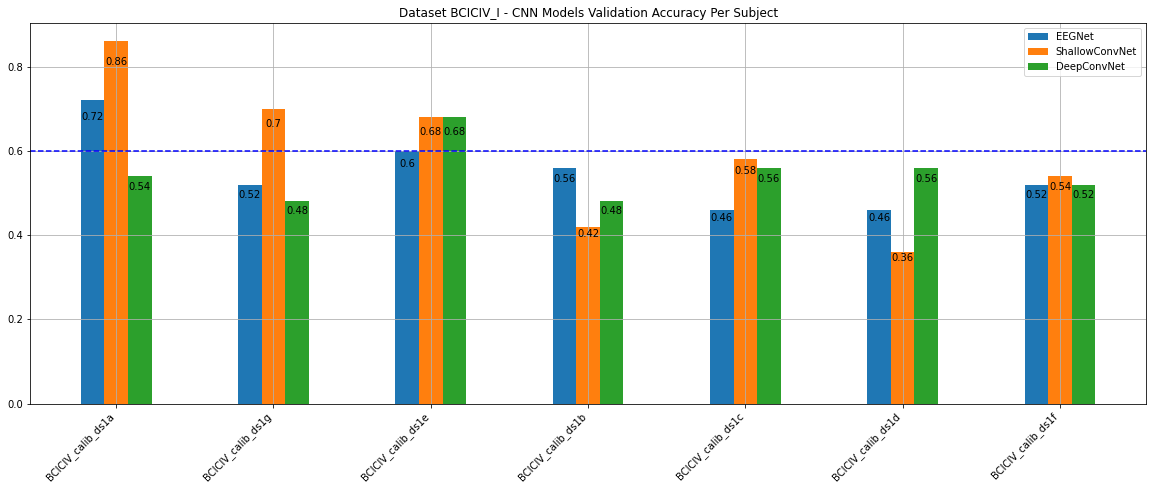

In [116]:
x = np.arange(len(individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset BCICIV_I - CNN Models Validation Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

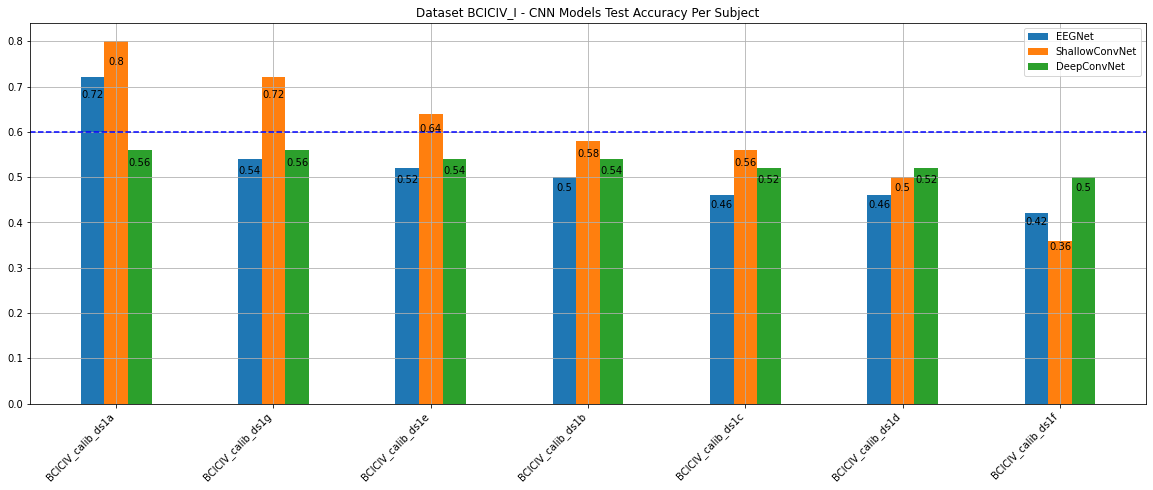

In [117]:
x = np.arange(len(individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset BCICIV_I - CNN Models Test Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

## Dataset 2 - BCICIV_II

In [118]:
global_performance_BCICIV_I = cnn_BCICIV_II[cnn_BCICIV_II["subject"] == 'all']
global_performance_BCICIV_I

,model,dataset,subject,acc_train,acc_val,acc_test
33,ShallowConvNet,BCICIV_II,all,0.574495,0.416667,0.401515
56,EEGNet,BCICIV_II,all,0.571970,0.328283,0.320707
148,DeepConvNet,BCICIV_II,all,0.816919,0.227273,0.214646


In [119]:
individual_performance_BCICIV_I = cnn_BCICIV_I[cnn_BCICIV_I["subject"] != 'all']
individual_performance_BCICIV_I.head()

,model,dataset,subject,acc_train,acc_val,acc_test
0,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1a,1.00,0.86,0.80
1,EEGNet,BCICIV_I,BCICIV_calib_ds1a,0.91,0.72,0.72
2,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1f,1.00,0.70,0.72
4,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1g,0.99,0.68,0.64
5,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1c,1.00,0.42,0.58


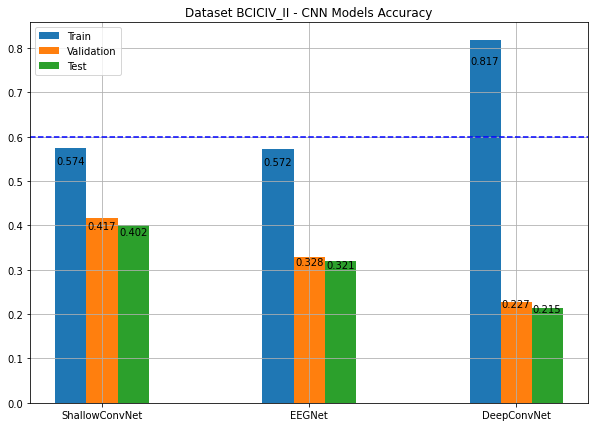

In [120]:
x = np.arange(len(global_performance_BCICIV_I['acc_val']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(10,7))
train = ax.bar(x - width, global_performance_BCICIV_I['acc_train'], width, label='Train')
validation = ax.bar(x, global_performance_BCICIV_I['acc_val'], width, label='Validation')
test = ax.bar(x + width, global_performance_BCICIV_I['acc_test'], width, label='Test')



autolabel(train,np.round(global_performance_BCICIV_I['acc_train'].values,3))
autolabel(validation,np.round(global_performance_BCICIV_I['acc_val'].values,3))
autolabel(test,np.round(global_performance_BCICIV_I['acc_test'].values,3))

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset BCICIV_II - CNN Models Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(global_performance_BCICIV_I['model'])
ax.grid()
ax.legend();

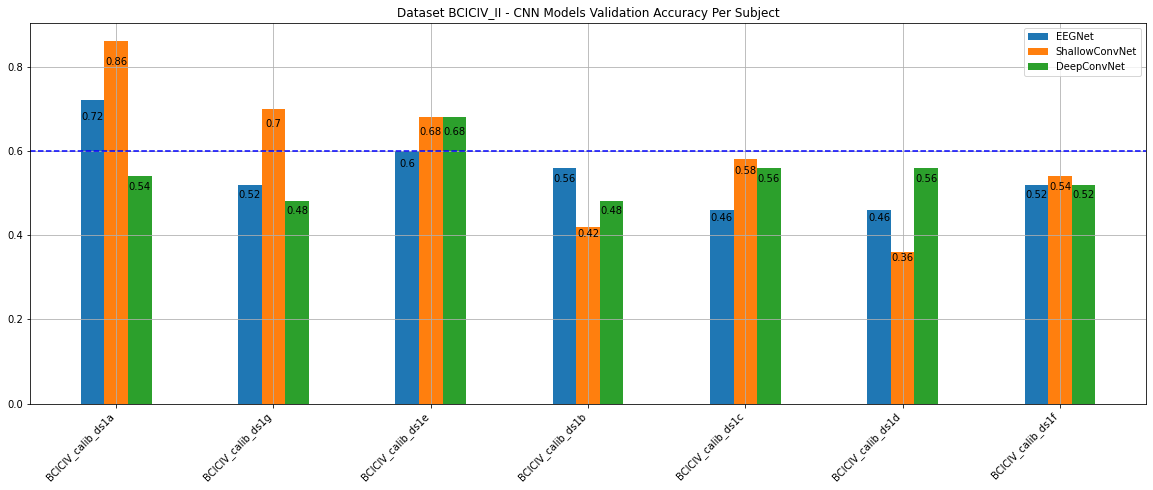

In [121]:
x = np.arange(len(individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset BCICIV_II - CNN Models Validation Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

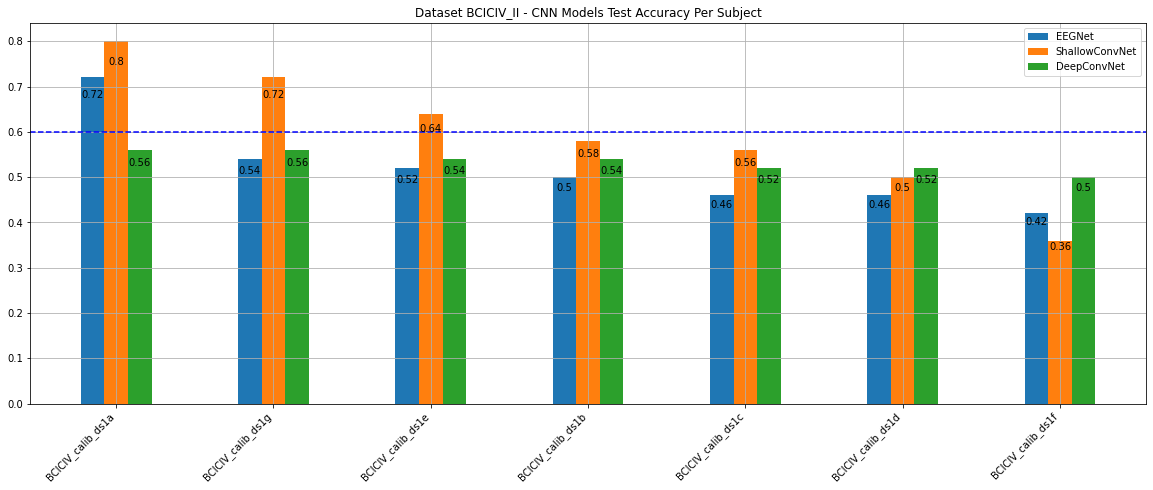

In [122]:
x = np.arange(len(individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset BCICIV_II - CNN Models Test Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

## Dataset 3 - eeg-mi

In [123]:
global_performance_BCICIV_I = cnn_eeg_mi[cnn_eeg_mi["subject"] == 'all']
global_performance_BCICIV_I

,model,dataset,subject,acc_train,acc_val,acc_test
41,EEGNet,eeg-mi,all,0.419728,0.380567,0.368421
83,ShallowConvNet,eeg-mi,all,0.478160,0.274725,0.274725
96,DeepConvNet,eeg-mi,all,0.485681,0.230191,0.248120


In [124]:
individual_performance_BCICIV_I = cnn_eeg_mi[cnn_eeg_mi["subject"] != 'all']
individual_performance_BCICIV_I.head()

,model,dataset,subject,acc_train,acc_val,acc_test
25,ShallowConvNet,eeg-mi,S032,0.877778,0.488889,0.466667
28,ShallowConvNet,eeg-mi,S043,1.000000,0.333333,0.444444
29,ShallowConvNet,eeg-mi,S042,0.766667,0.311111,0.422222
30,EEGNet,eeg-mi,S028,0.955556,0.200000,0.422222
34,ShallowConvNet,eeg-mi,S008,0.977778,0.400000,0.400000


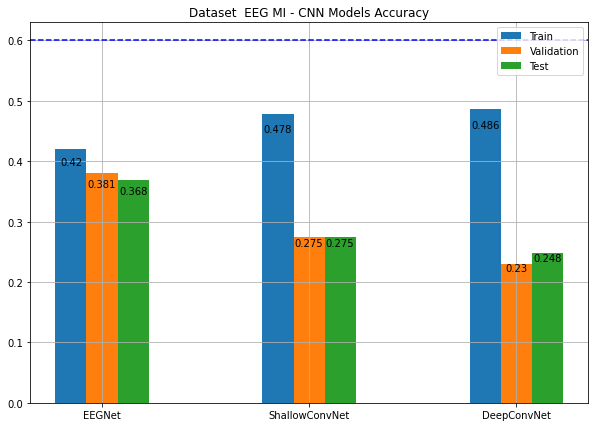

In [125]:
x = np.arange(len(global_performance_BCICIV_I['acc_val']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(10,7))
train = ax.bar(x - width, global_performance_BCICIV_I['acc_train'], width, label='Train')
validation = ax.bar(x, global_performance_BCICIV_I['acc_val'], width, label='Validation')
test = ax.bar(x + width, global_performance_BCICIV_I['acc_test'], width, label='Test')



autolabel(train,np.round(global_performance_BCICIV_I['acc_train'].values,3))
autolabel(validation,np.round(global_performance_BCICIV_I['acc_val'].values,3))
autolabel(test,np.round(global_performance_BCICIV_I['acc_test'].values,3))

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset  EEG MI - CNN Models Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(global_performance_BCICIV_I['model'])
ax.grid()
ax.legend();

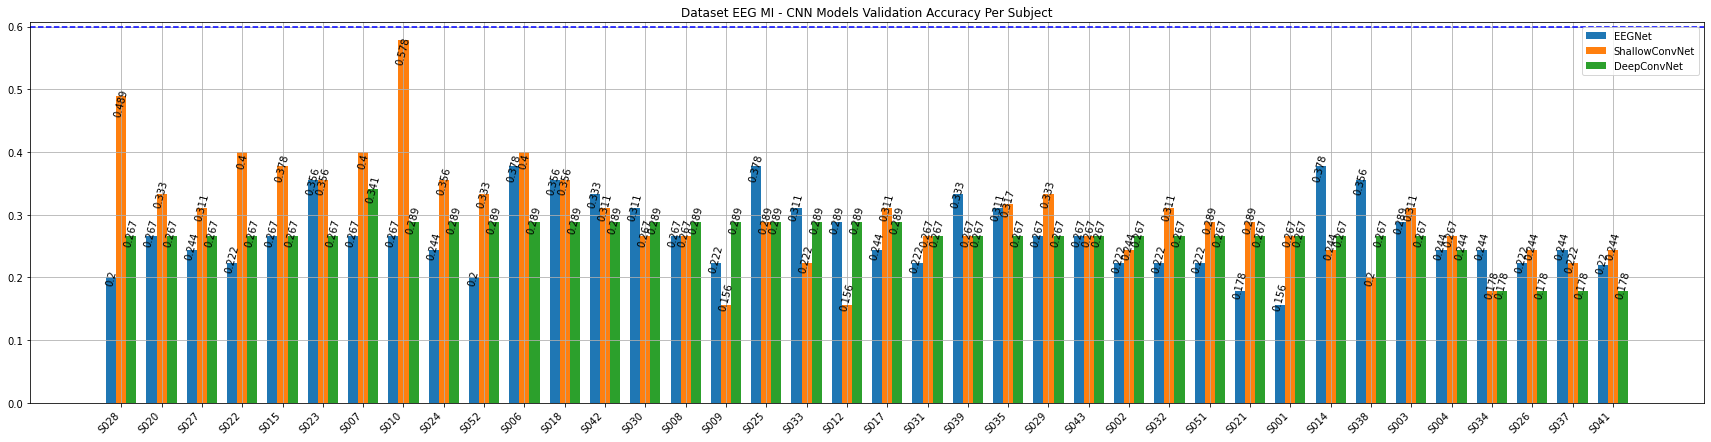

In [126]:
x = np.arange(len(individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.25  # largura das barras

fig, ax = plt.subplots(figsize=(30,7))


eeg_net = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3), 75)
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3), 75)
autolabel(deep_conv_plot,np.round(deep_conv.values,3), 75)

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset EEG MI - CNN Models Validation Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

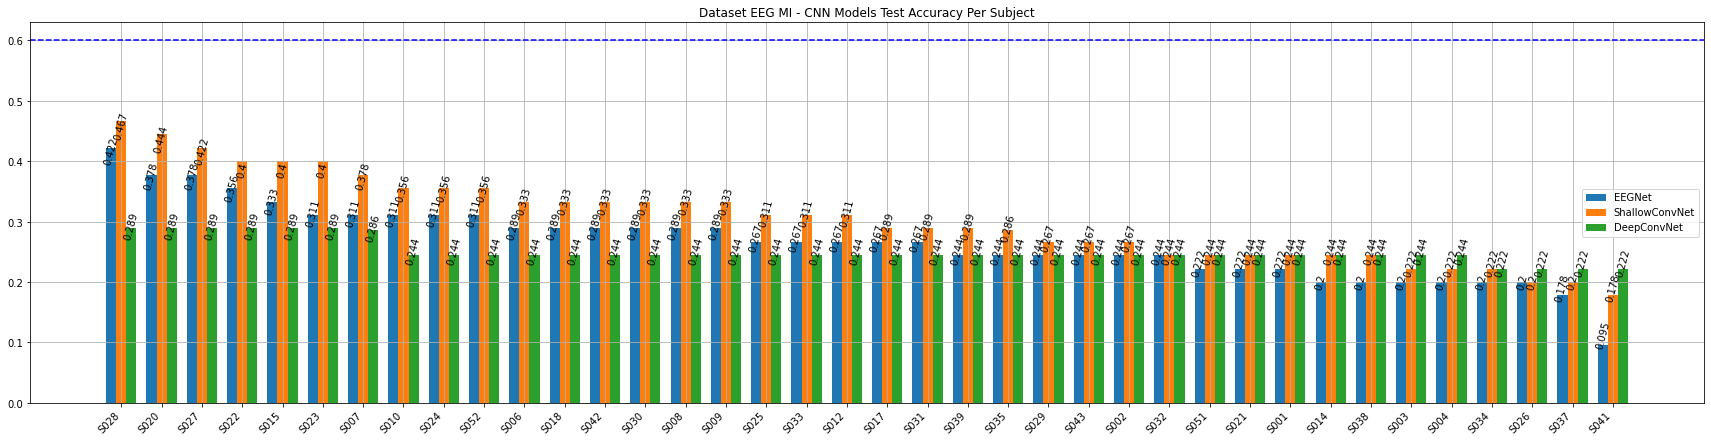

In [127]:
x = np.arange(len(individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.25  # largura das barras

fig, ax = plt.subplots(figsize=(30,7))


eeg_net = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3), 75)
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3), 75)
autolabel(deep_conv_plot,np.round(deep_conv.values,3), 75)

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset EEG MI - CNN Models Test Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

# Machine Learning Models

In [128]:
df_ml
ml_BCICIV_I = df_ml[df_ml["dataset"] == 'BCICIV_I']
ml_BCICIV_II = df_ml[df_ml["dataset"] == 'BCICIV_II']
ml_eeg_mi = df_ml[df_ml["dataset"] == 'eeg-mi']

## Dataset 1 - BCICIV_I

In [129]:
global_performance_BCICIV_I = ml_BCICIV_I[ml_BCICIV_I["subject"] == 'all']
global_performance_BCICIV_I.head()

,cross_val_score,Accuracy,Precision,Recall,F1_score,auc,kappa,mathew_coef,dataset,subject,pipeline,model_name
25,0.540,0.474286,0.474919,0.474286,0.474354,0.474510,-0.050914,-0.050967,BCICIV_I,all,time domain features -> wavelet,XGB
26,0.536,0.488571,0.489446,0.488571,0.488526,0.489052,-0.021856,-0.021899,BCICIV_I,all,time domain features -> wavelet,KNN
36,0.496,0.521429,0.518924,0.521429,0.498669,0.515359,0.031072,0.033935,BCICIV_I,all,time domain features -> wavelet,SVM


In [130]:
individual_performance_BCICIV_I = ml_BCICIV_I[ml_BCICIV_I["subject"] != 'all']
individual_performance_BCICIV_I.head()

,cross_val_score,Accuracy,Precision,Recall,F1_score,auc,kappa,mathew_coef,dataset,subject,pipeline,model_name
3,0.69,0.68,0.680000,0.68,0.680000,0.679872,0.359744,0.359744,BCICIV_I,BCICIV_calib_ds1g,time domain features -> wavelet,SVM
4,0.64,0.74,0.748995,0.74,0.736834,0.737895,0.477702,0.487642,BCICIV_I,BCICIV_calib_ds1a,time domain features -> wavelet,SVM
6,0.62,0.51,0.510625,0.51,0.509853,0.510404,0.020783,0.020821,BCICIV_I,BCICIV_calib_ds1c,time domain features -> wavelet,XGB
8,0.61,0.54,0.541697,0.54,0.538894,0.541016,0.081836,0.082430,BCICIV_I,BCICIV_calib_ds1a,time domain features -> wavelet,KNN
10,0.60,0.51,0.512750,0.51,0.505109,0.512005,0.023904,0.024500,BCICIV_I,BCICIV_calib_ds1e,time domain features -> wavelet,SVM


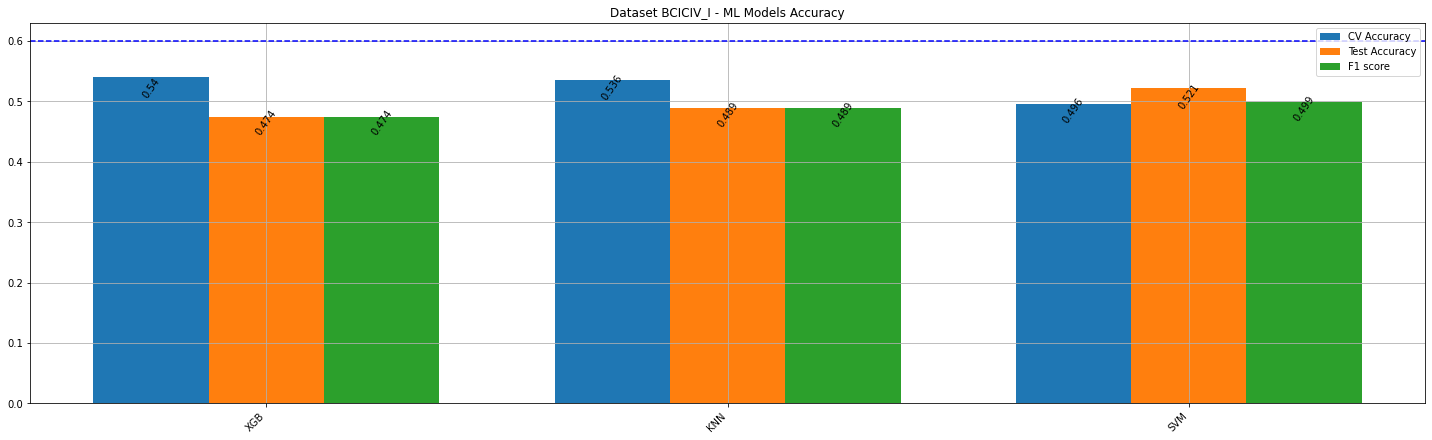

In [131]:
x = np.arange(len(global_performance_BCICIV_I['cross_val_score']))  # pontos do eixo x
width = 0.25  # largura das barras

fig, ax = plt.subplots(figsize=(25,7))
train = ax.bar(x - width, global_performance_BCICIV_I['cross_val_score'], width, label='CV Accuracy')
validation = ax.bar(x, global_performance_BCICIV_I['Accuracy'], width, label='Test Accuracy')
test = ax.bar(x + width, global_performance_BCICIV_I['F1_score'], width, label='F1 score')



autolabel(train,np.round(global_performance_BCICIV_I['cross_val_score'].values,3),rot=55)
autolabel(validation,np.round(global_performance_BCICIV_I['Accuracy'].values,3),rot=55)
autolabel(test,np.round(global_performance_BCICIV_I['F1_score'].values,3),rot=55)

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset BCICIV_I - ML Models Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(global_performance_BCICIV_I['model_name'], rotation = 45, ha="right")
ax.grid()
ax.legend();

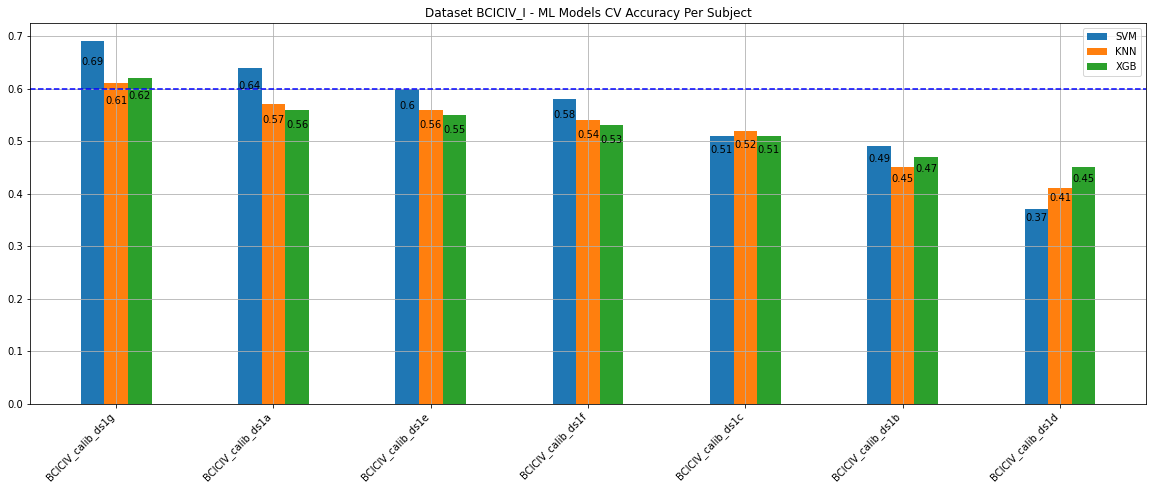

In [132]:
x = np.arange(len(individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'SVM']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


svm = individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'SVM']
knn = individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'KNN']
xgb = individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'XGB']

svm_plot = ax.bar(x - width, svm, width, label='SVM')
knn_plot = ax.bar(x, knn, width, label='KNN')
xgb_plot = ax.bar(x + width, xgb, width, label='XGB')



autolabel(svm_plot,np.round(svm.values,3))
autolabel(knn_plot,np.round(knn.values,3))
autolabel(xgb_plot,np.round(xgb.values,3))

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset BCICIV_I - ML Models CV Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model_name'] == 'SVM'], rotation = 45, ha="right")
ax.grid()
ax.legend();

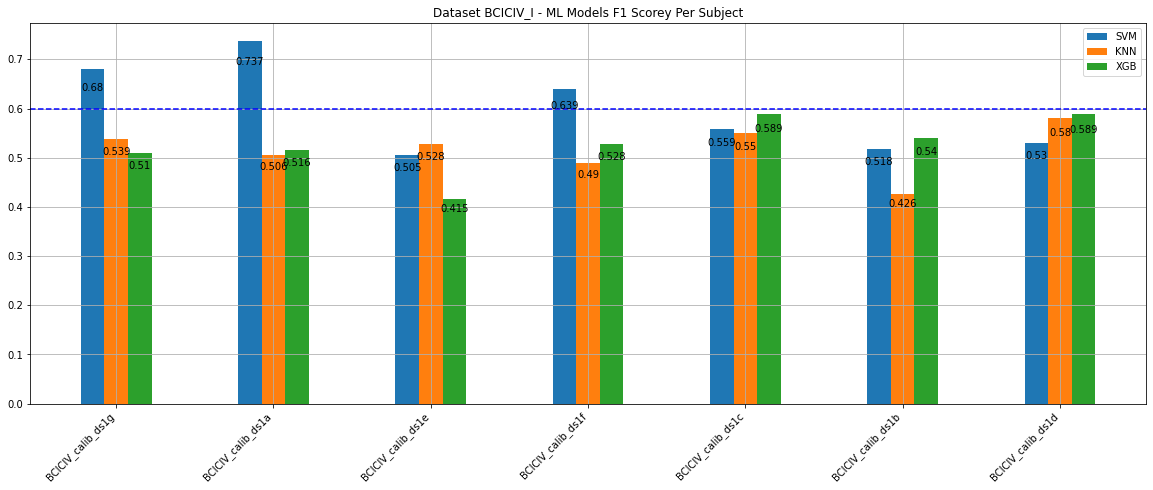

In [133]:
x = np.arange(len(individual_performance_BCICIV_I['F1_score'][individual_performance_BCICIV_I['model_name'] == 'SVM']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


svm = individual_performance_BCICIV_I['F1_score'][individual_performance_BCICIV_I['model_name'] == 'SVM']
knn = individual_performance_BCICIV_I['F1_score'][individual_performance_BCICIV_I['model_name'] == 'KNN']
xgb = individual_performance_BCICIV_I['F1_score'][individual_performance_BCICIV_I['model_name'] == 'XGB']

svm_plot = ax.bar(x - width, svm, width, label='SVM')
knn_plot = ax.bar(x, knn, width, label='KNN')
xgb_plot = ax.bar(x + width, xgb, width, label='XGB')



autolabel(svm_plot,np.round(svm.values,3))
autolabel(knn_plot,np.round(knn.values,3))
autolabel(xgb_plot,np.round(xgb.values,3))

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset BCICIV_I - ML Models F1 Scorey Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model_name'] == 'SVM'], rotation = 45, ha="right")
ax.grid()
ax.legend();

## Dataset 2 - BCICIV_II

In [134]:
global_performance_BCICIV_I = ml_BCICIV_II[ml_BCICIV_II["subject"] == 'all']
global_performance_BCICIV_I.head()

,cross_val_score,Accuracy,Precision,Recall,F1_score,auc,kappa,mathew_coef,dataset,subject,pipeline,model_name
73,0.357,0.334596,0.337633,0.334596,0.335463,0.459043,0.107988,0.108142,BCICIV_II,all,time domain features -> wavelet,XGB
121,0.279,0.253788,0.252116,0.253788,0.252283,0.493535,-0.005823,-0.005834,BCICIV_II,all,time domain features -> wavelet,KNN
132,0.271,0.301768,0.317070,0.301768,0.303849,0.496349,0.071664,0.072429,BCICIV_II,all,time domain features -> wavelet,SVM


In [135]:
individual_performance_BCICIV_I = ml_BCICIV_II[ml_BCICIV_II["subject"] != 'all']
individual_performance_BCICIV_I.head()

,cross_val_score,Accuracy,Precision,Recall,F1_score,auc,kappa,mathew_coef,dataset,subject,pipeline,model_name
16,0.580,0.513889,0.522396,0.513889,0.513232,0.518648,0.036697,0.037398,BCICIV_II,A04T,time domain features -> wavelet,XGB
30,0.528,0.513889,0.525198,0.513889,0.511353,0.520979,0.041096,0.042405,BCICIV_II,A04T,time domain features -> wavelet,KNN
40,0.486,0.583333,0.585521,0.583333,0.583978,0.582751,0.164733,0.164989,BCICIV_II,A04T,time domain features -> wavelet,SVM
45,0.459,0.395833,0.402758,0.395833,0.393562,0.535501,0.197695,0.199887,BCICIV_II,A05T,time domain features -> wavelet,XGB
86,0.327,0.347222,0.358301,0.347222,0.347739,0.456182,0.132697,0.134030,BCICIV_II,A05T,time domain features -> wavelet,SVM


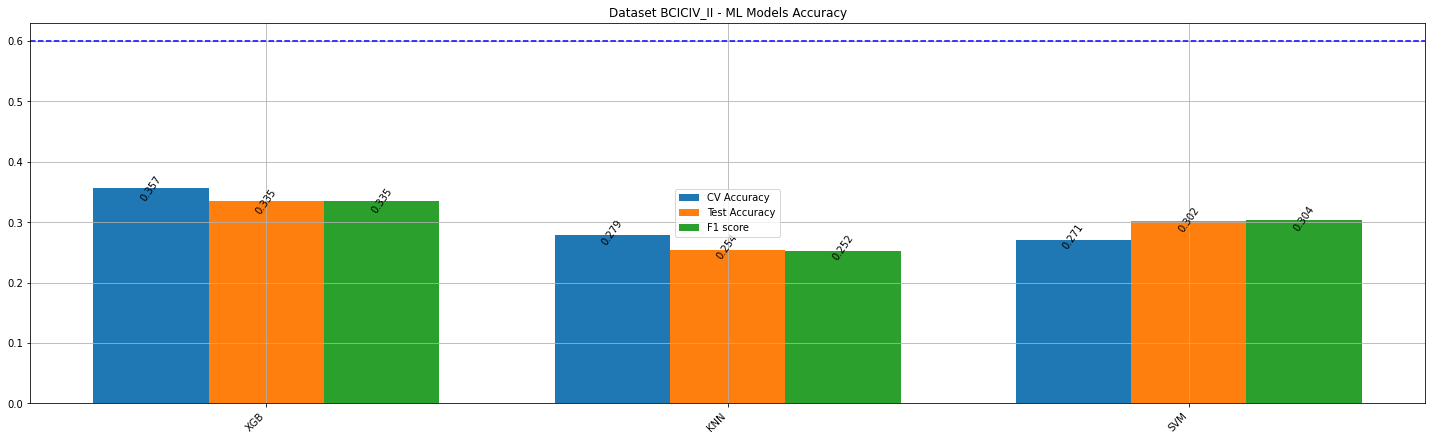

In [136]:
x = np.arange(len(global_performance_BCICIV_I['cross_val_score']))  # pontos do eixo x
width = 0.25  # largura das barras

fig, ax = plt.subplots(figsize=(25,7))
train = ax.bar(x - width, global_performance_BCICIV_I['cross_val_score'], width, label='CV Accuracy')
validation = ax.bar(x, global_performance_BCICIV_I['Accuracy'], width, label='Test Accuracy')
test = ax.bar(x + width, global_performance_BCICIV_I['F1_score'], width, label='F1 score')



autolabel(train,np.round(global_performance_BCICIV_I['cross_val_score'].values,3),rot=55)
autolabel(validation,np.round(global_performance_BCICIV_I['Accuracy'].values,3),rot=55)
autolabel(test,np.round(global_performance_BCICIV_I['F1_score'].values,3),rot=55)

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset BCICIV_II - ML Models Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(global_performance_BCICIV_I['model_name'], rotation = 45, ha="right")
ax.grid()
ax.legend();

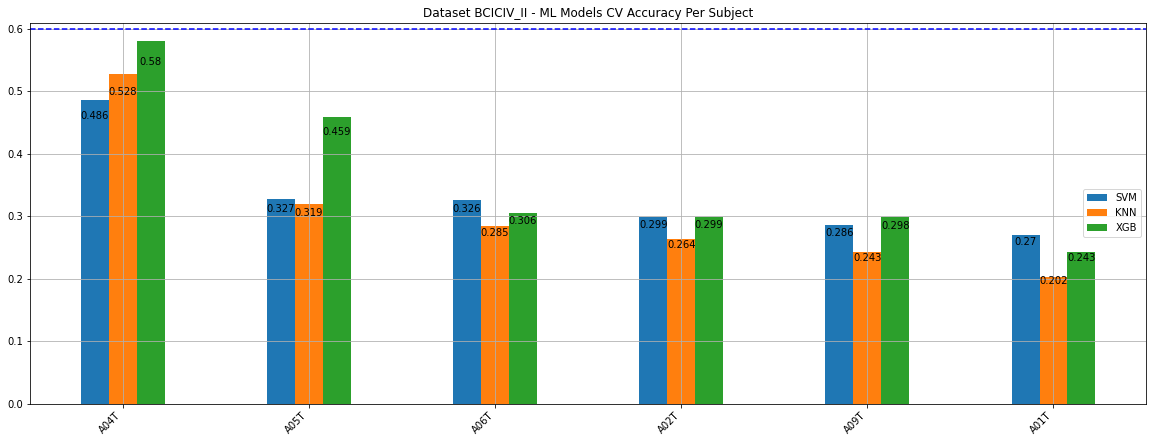

In [137]:
x = np.arange(len(individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'SVM']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


svm = individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'SVM']
knn = individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'KNN']
xgb = individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'XGB']

svm_plot = ax.bar(x - width, svm, width, label='SVM')
knn_plot = ax.bar(x, knn, width, label='KNN')
xgb_plot = ax.bar(x + width, xgb, width, label='XGB')



autolabel(svm_plot,np.round(svm.values,3))
autolabel(knn_plot,np.round(knn.values,3))
autolabel(xgb_plot,np.round(xgb.values,3))

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset BCICIV_II - ML Models CV Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model_name'] == 'SVM'], rotation = 45, ha="right")
ax.grid()
ax.legend();

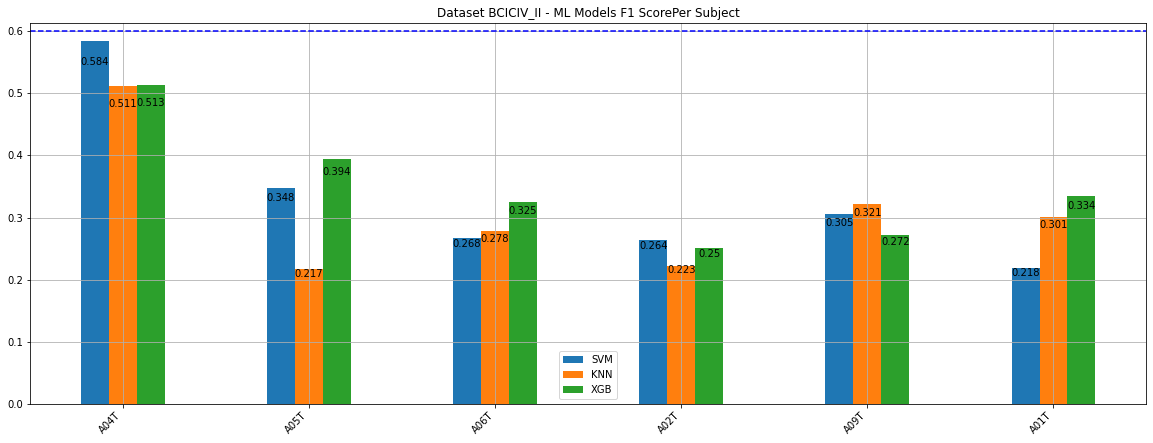

In [138]:
x = np.arange(len(individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'SVM']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


svm = individual_performance_BCICIV_I['F1_score'][individual_performance_BCICIV_I['model_name'] == 'SVM']
knn = individual_performance_BCICIV_I['F1_score'][individual_performance_BCICIV_I['model_name'] == 'KNN']
xgb = individual_performance_BCICIV_I['F1_score'][individual_performance_BCICIV_I['model_name'] == 'XGB']

svm_plot = ax.bar(x - width, svm, width, label='SVM')
knn_plot = ax.bar(x, knn, width, label='KNN')
xgb_plot = ax.bar(x + width, xgb, width, label='XGB')



autolabel(svm_plot,np.round(svm.values,3))
autolabel(knn_plot,np.round(knn.values,3))
autolabel(xgb_plot,np.round(xgb.values,3))

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset BCICIV_II - ML Models F1 ScorePer Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model_name'] == 'SVM'], rotation = 45, ha="right")
ax.grid()
ax.legend();

## Dataset 3 - eeg-mi

In [139]:
global_performance_BCICIV_I = ml_eeg_mi[ml_eeg_mi["subject"] == 'all']
global_performance_BCICIV_I.head()

,cross_val_score,Accuracy,Precision,Recall,F1_score,auc,kappa,mathew_coef,dataset,subject,pipeline,model_name
65,0.385,0.408329,0.408402,0.408329,0.407584,0.436778,0.211267,0.211539,eeg-mi,all,time domain features -> wavelet,XGB
95,0.312,0.311163,0.311089,0.311163,0.306493,0.441924,0.083231,0.084132,eeg-mi,all,time domain features -> wavelet,SVM
131,0.275,0.278195,0.282192,0.278195,0.276877,0.491326,0.038857,0.039129,eeg-mi,all,time domain features -> wavelet,KNN


In [140]:
individual_performance_BCICIV_I = ml_eeg_mi[ml_eeg_mi["subject"] != 'all']
individual_performance_BCICIV_I.head()

,cross_val_score,Accuracy,Precision,Recall,F1_score,auc,kappa,mathew_coef,dataset,subject,pipeline,model_name
0,0.722,0.700000,0.694514,0.700000,0.695579,0.451330,0.599407,0.600397,eeg-mi,S009,time domain features -> wavelet,XGB
1,0.722,0.633333,0.660601,0.633333,0.634113,0.390655,0.510547,0.516175,eeg-mi,S018,time domain features -> wavelet,XGB
2,0.711,0.466667,0.466843,0.466667,0.465214,0.536016,0.287129,0.287746,eeg-mi,S002,time domain features -> wavelet,XGB
5,0.622,0.733333,0.740796,0.733333,0.732745,0.509734,0.644795,0.647245,eeg-mi,S026,time domain features -> wavelet,XGB
7,0.611,0.600000,0.621467,0.600000,0.600105,0.467878,0.469635,0.475789,eeg-mi,S037,time domain features -> wavelet,XGB


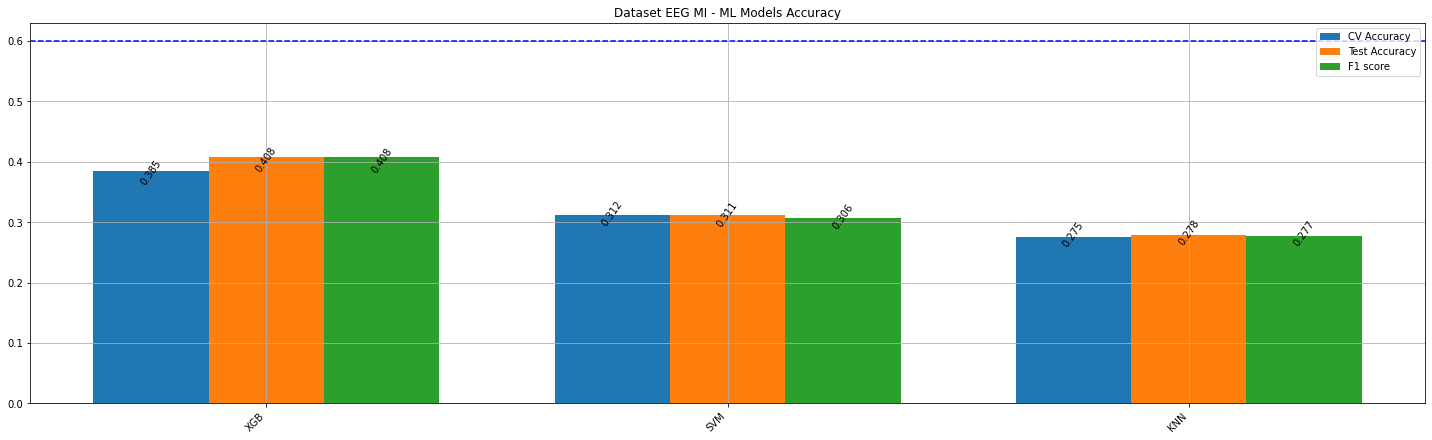

In [141]:
x = np.arange(len(global_performance_BCICIV_I['cross_val_score']))  # pontos do eixo x
width = 0.25  # largura das barras

fig, ax = plt.subplots(figsize=(25,7))
train = ax.bar(x - width, global_performance_BCICIV_I['cross_val_score'], width, label='CV Accuracy')
validation = ax.bar(x, global_performance_BCICIV_I['Accuracy'], width, label='Test Accuracy')
test = ax.bar(x + width, global_performance_BCICIV_I['F1_score'], width, label='F1 score')



autolabel(train,np.round(global_performance_BCICIV_I['cross_val_score'].values,3),rot=55)
autolabel(validation,np.round(global_performance_BCICIV_I['Accuracy'].values,3),rot=55)
autolabel(test,np.round(global_performance_BCICIV_I['F1_score'].values,3),rot=55)

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset EEG MI - ML Models Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(global_performance_BCICIV_I['model_name'], rotation = 45, ha="right")
ax.grid()
ax.legend();

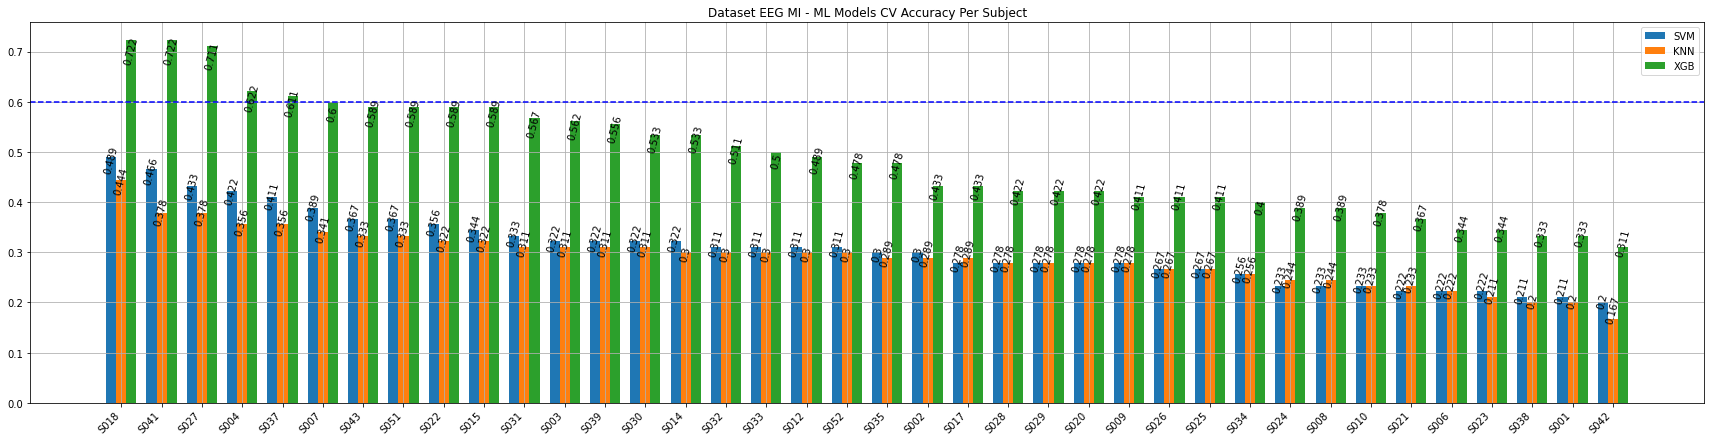

In [142]:
x = np.arange(len(individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'SVM']))  # pontos do eixo x
width = 0.25  # largura das barras

fig, ax = plt.subplots(figsize=(30,7))


svm = individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'SVM']
knn = individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'KNN']
xgb = individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'XGB']

svm_plot = ax.bar(x - width, svm, width, label='SVM')
knn_plot = ax.bar(x, knn, width, label='KNN')
xgb_plot = ax.bar(x + width, xgb, width, label='XGB')



autolabel(svm_plot,np.round(svm.values,3), 75)
autolabel(knn_plot,np.round(knn.values,3), 75)
autolabel(xgb_plot,np.round(xgb.values,3), 75)


plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset EEG MI - ML Models CV Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model_name'] == 'SVM'], rotation = 45, ha="right")
ax.grid()
ax.legend();

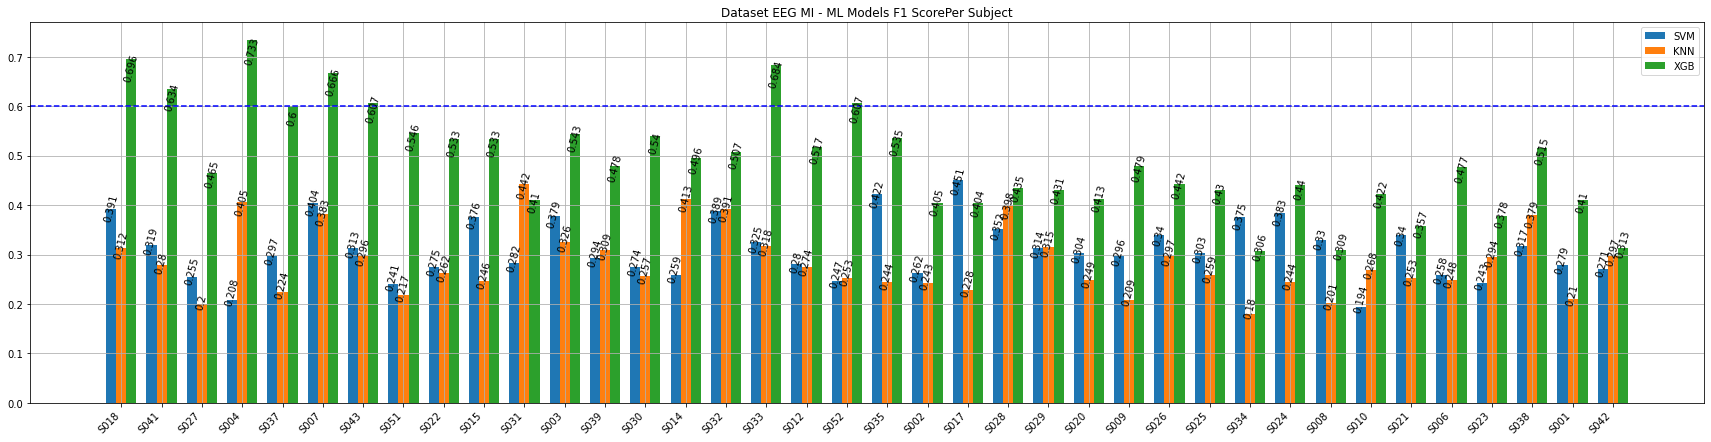

In [143]:
x = np.arange(len(individual_performance_BCICIV_I['cross_val_score'][individual_performance_BCICIV_I['model_name'] == 'SVM']))  # pontos do eixo x
width = 0.25  # largura das barras

fig, ax = plt.subplots(figsize=(30,7))


svm = individual_performance_BCICIV_I['F1_score'][individual_performance_BCICIV_I['model_name'] == 'SVM']
knn = individual_performance_BCICIV_I['F1_score'][individual_performance_BCICIV_I['model_name'] == 'KNN']
xgb = individual_performance_BCICIV_I['F1_score'][individual_performance_BCICIV_I['model_name'] == 'XGB']

svm_plot = ax.bar(x - width, svm, width, label='SVM')
knn_plot = ax.bar(x, knn, width, label='KNN')
xgb_plot = ax.bar(x + width, xgb, width, label='XGB')



autolabel(svm_plot,np.round(svm.values,3), 75)
autolabel(knn_plot,np.round(knn.values,3), 75)
autolabel(xgb_plot,np.round(xgb.values,3), 75)

plt.axhline(y = 0.6, color = 'b', linestyle = '--')
ax.set_title('Dataset EEG MI - ML Models F1 ScorePer Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model_name'] == 'SVM'], rotation = 45, ha="right")
ax.grid()
ax.legend();

# Transformers Models

# Comparing Models